#### Remove Duplicates (Easy) [TIP102-2-1]
- LeetCode: https://leetcode.com/problems/remove-duplicates-from-sorted-list/
- CodePath Solution: https://guides.codepath.org/compsci/Remove-Duplicates-from-Sorted-List
- Video Solution: https://youtu.be/sV9OOgbeEME?list=PLrT2tZ9JRrf4cuavFcwQw6qfR8M9m7pEd&t=1160

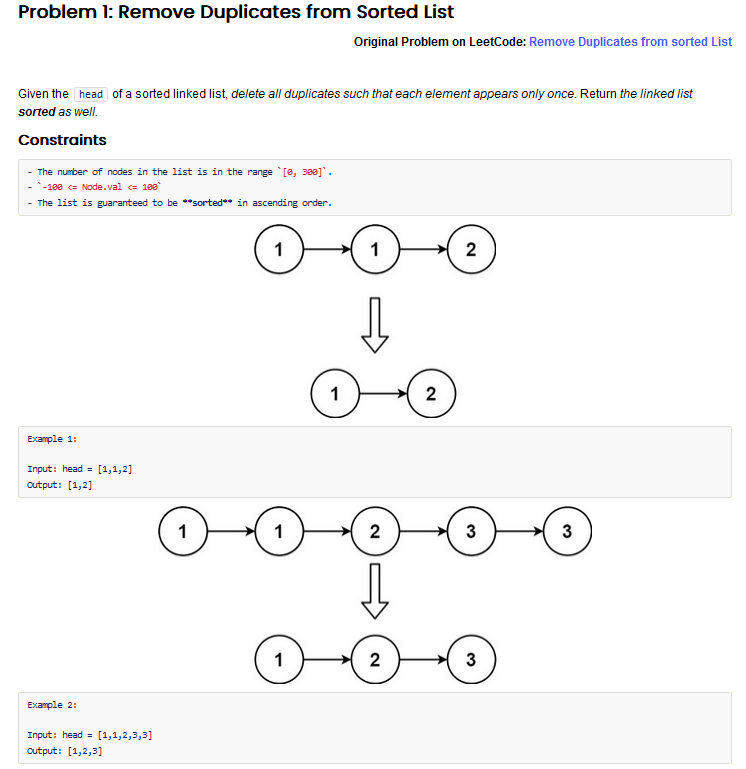

#### Understand:
    1. Can the list be empty? Yes
    2. Will there always be duplicates? No
    3. What is the time complexity? 
        a. Time: O(n), Space: O(n)
        b. Time: O(n), Space: O(1)
    4. NOTE: Since list is sorted the duplicate elements will be next to each other

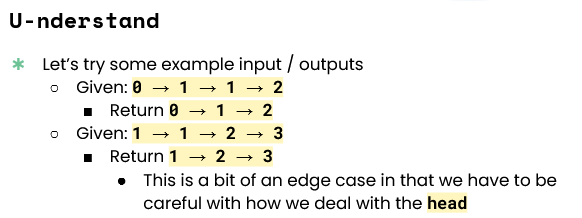

#### Match:
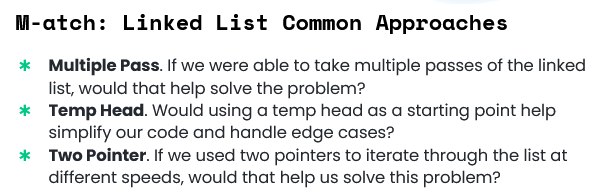
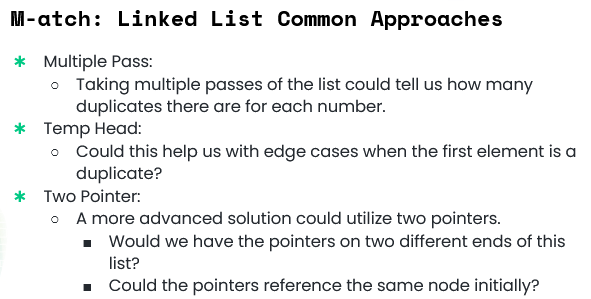

#### Plan
    1. Idea 1: Store all unique elements in an array, sorted, then create a new LinkedList
        a. Time: O(n), Space: O(n)
            i. One loop through list, second loop to rebuild list; for space array build is O(n)

    2. Idea 2: Use two pointers to set the first instance of a duplicates next pointer to the next unique element 
        Use the fast pointer as a scout for the linked list
        a. Time: O(n), Space: O(1)

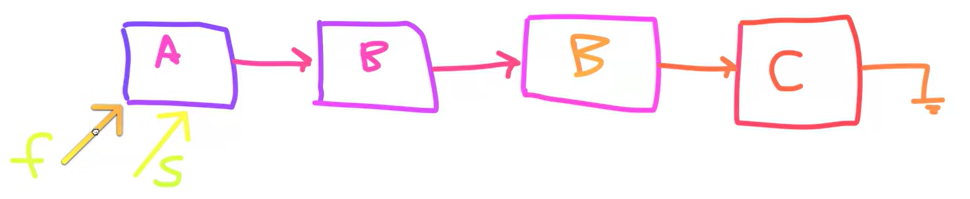
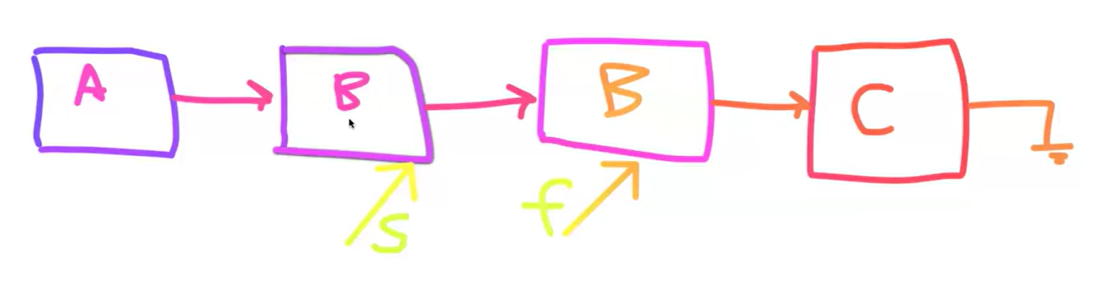
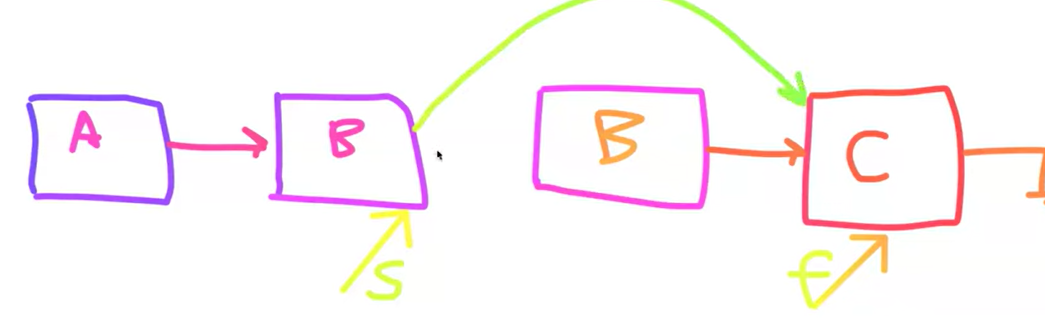
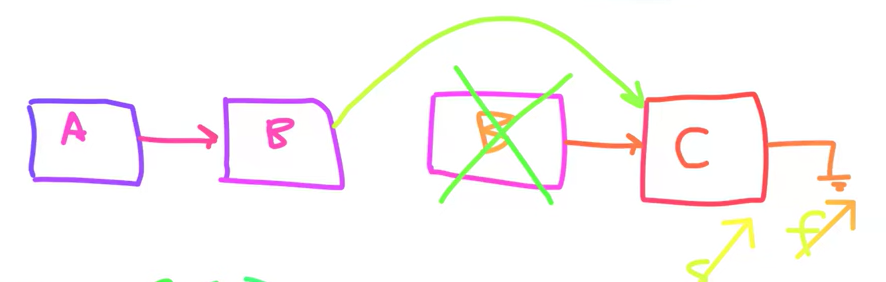

```
PseudoCode:
    if empty list:
    return 

    init slow and fast pointers
    slow = head
    fast = head.next

    while fast != None:
        if duplicate node detected
        if fast.val == slow.val:
            set slow.next = fast.next
            set fast = slow.next

        else:
            slow = fast
            fast = fast.next
    
    return head when fast == None (entire list processed)


```

#### Implement:

In [1]:
#Implement ListNode class and helper functions
class ListNode:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

def create_linked_list(values):
    l = ListNode(None)
    if values:
        for val in reversed(values):
            l.next = ListNode(val, l.next)
    return l.next

def compare_linked_lists(l1, l2):
    if not(l1) and not(l2): return True
    if not(l1) or not(l2): return False
    if l1.val != l2.val: return False
    if l1.next == None: return l2.next == None
    return compare_linked_lists(l1.next, l2.next)


In [11]:
#Solution Function
def remove_duplicates(head):
    #return if empty list
    #init fast and slow pointers 
    slow = head
    fast = head
    
    #while not at end of list
    while fast:
        
        #while not at end and fast.val == slow.val
        #move fast pointer until at non duplicate node
        while fast and fast.val == slow.val:
            fast = fast.next
        
        #set slow.next == fast cutting out duplicate node 
        slow.next = fast
        
        #move slow pointer to position of fast and continue looping
        slow = fast
        
    return head

In [13]:
#Test Solution helper function
def test_solution():
    tests = [
        {'input': [], 'output':[]},
        {'input': [1], 'output':[1]},
        {'input': [1, 2], 'output':[1, 2]},
        {'input': [1,2,2], 'output':[1,2]},
        {'input': [1,1,3,4,6,6], 'output':[1,3,4,6]}
    ]
    
    
    
    for i in range(len(tests)):
        input_list = create_linked_list(tests[i]['input'])
        output_list = create_linked_list(tests[i]['output'])
        
        print(
            'Test',
            i + 1,
            'Pass:',
            compare_linked_lists(
                remove_duplicates(input_list), 
                output_list)
        )

test_solution()

Test 1 Pass: True
Test 2 Pass: True
Test 3 Pass: True
Test 4 Pass: True
Test 5 Pass: True


#### Complexity Analysis
    Time: O(n) : iterate through entire list to check for duplicates
    Space: O(1) : only use pointers no matter what input is

### Other Solutions

In [ ]:
def delete_duplicates_twoptr(head: ListNode):
    if not(head):
        return 
    
    #init current and previous nodes, one at start and one at start+1
    previous = head
    current = head.next
    
    #traverse list
    while current:
        
        #if duplicate values then:
            #cut the duplicate node and move the current pointer
        if current.val == previous.val:
            previous.next = current.next
            current = previous.next
        
        #if not duplicate then move ptrs
        else:
            previous = current
            current = current.next
    
    return head


In [ ]:
def delete_duplicates_oneptr(head: ListNode):
    #init ptr at start
    current_node = head
    
    #traverse list
    while current_node:
        
        #while not at last node and duplicate nodes found, iterate ptr until non duplicate node
        while current_node.next and current_node.next.val == current_node.val:
            current_node.next = current_node.next.next
        
        #move ptr to non duplicate node
        current_node = current_node.next
    
    return head
